#### An attempt to build a classifier that can predict whether or not I like a song

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
data.shape

(2017, 17)

In [5]:
print (data['Unnamed: 0'].nunique())

data.drop(['Unnamed: 0'],axis=1, inplace=True)

2017


In [6]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [8]:
data.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

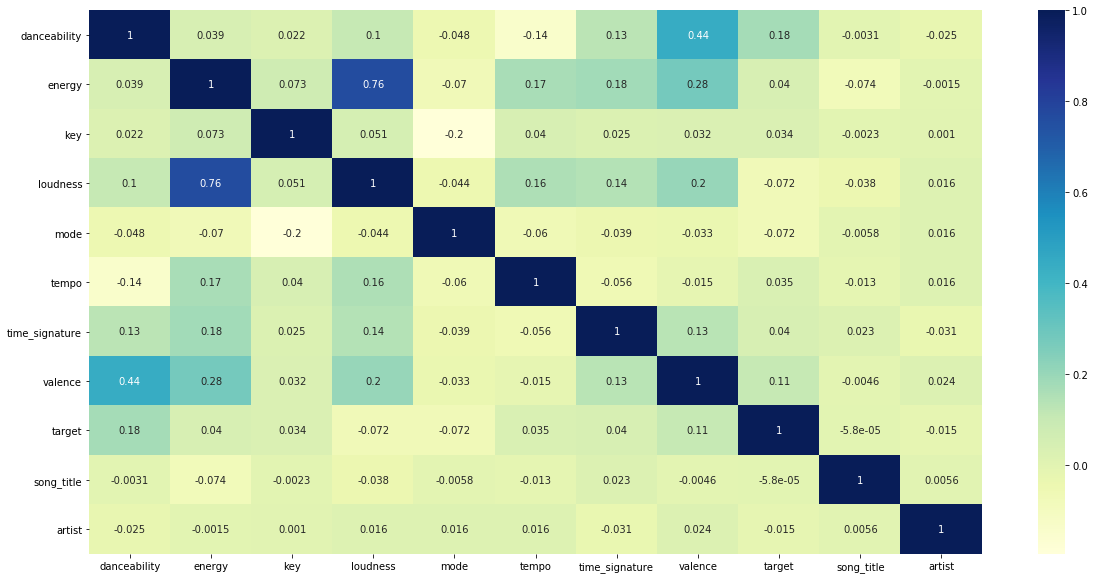

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

## EDA

* We have zero values in the column 'instrumentalness' so we have replace before using it

In [10]:
mean_instrumentalness = data['instrumentalness'].mean()

data = data.replace({'instrumentalness':{0 : mean_instrumentalness}})

In [11]:
data['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

* The dataset has almost balanced distribution of class

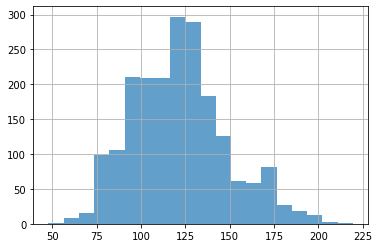

In [12]:
plt.figure(figsize=(6,4))
#plt.hist(data['tempo'],bins=20)
data['tempo'].hist(alpha=0.7,bins=20)

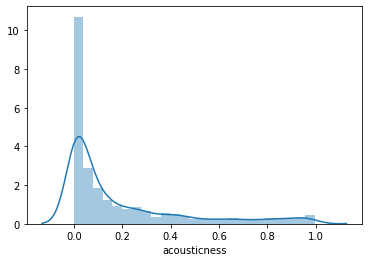

In [13]:
# Distribution for 'instrumentalness' feature
sns.distplot(data['acousticness'])

* This variable is right skewned so we should do some transformation before giving to the model 

In [14]:
df = data.drop(['target','song_title','artist'],axis=1)

data_col = df.columns

In [15]:
data_col

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

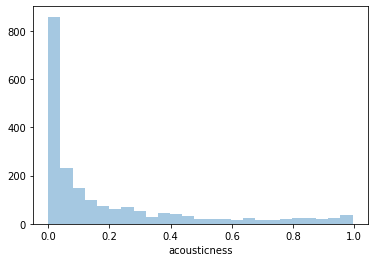

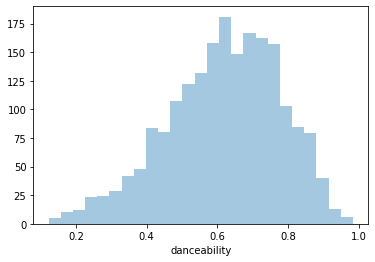

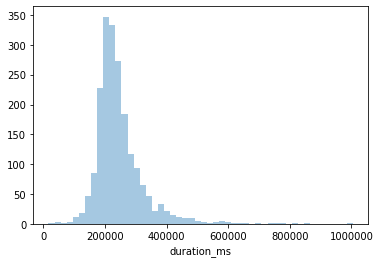

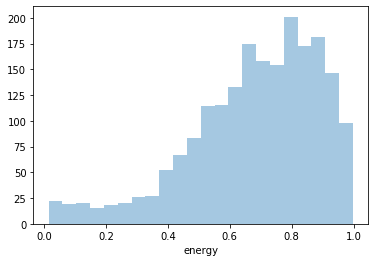

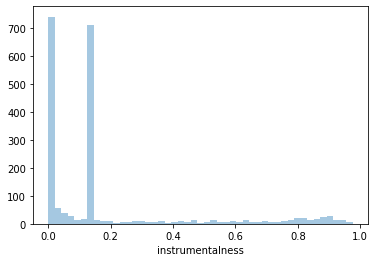

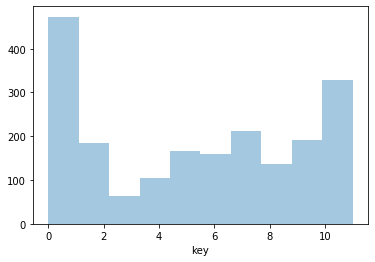

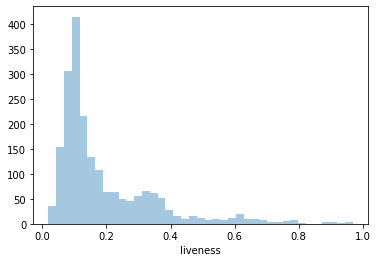

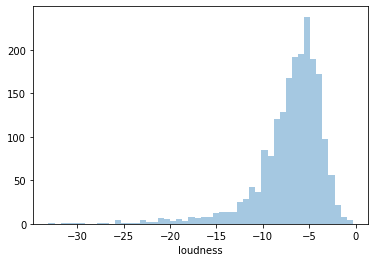

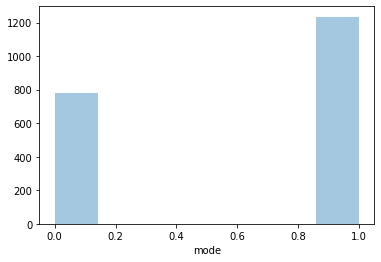

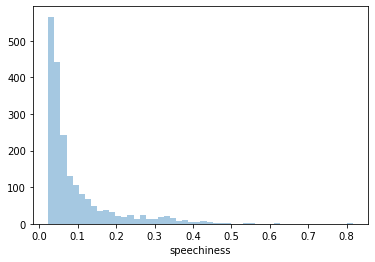

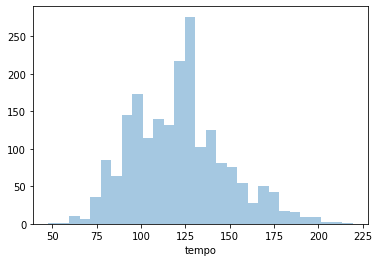

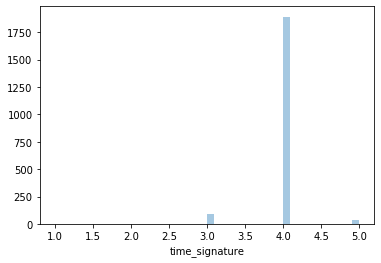

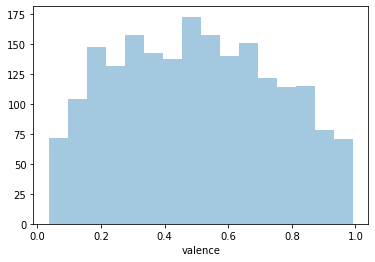

In [16]:
for x in data_col:
    plt.figure(figsize=(6,4))
    sns.distplot(data[x],kde=False)

* The features like 'acousticness','duration_ms', 'instrumentalness','liveness' and 'speechiness' are Right Skewed
* The Features like 'loudness' and 'energy' are left Skewed
 
* We have to perform some transformation operation on these data before feeding into the model

In [17]:
data['time_signature'].value_counts()

4.0    1891
3.0      93
5.0      32
1.0       1
Name: time_signature, dtype: int64

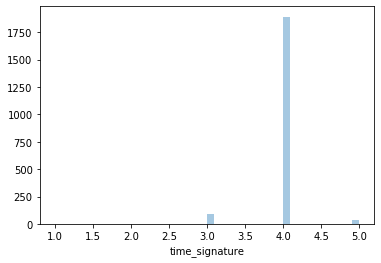

In [18]:
sns.distplot(data['time_signature'],kde=False)

* 'time_signature' feature is all about the time of the song and it is not much important for prediction

In [19]:
data.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.146696,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.126486,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.270355,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.126548,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.146696,-0.126486,0.270355,-0.126548,1.000000,-0.015170,-0.007084,-0.325433,-0.004699,-0.126267,-0.001048,-0.060935,-0.183411,0.107136
key,-0.081037,0.022325,0.023570,0.072886,-0.015170,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,-0.007084,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.325433,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.004699,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.126267,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


* The feature 'acousticness' ,'loudness','mode' are negatively correlated with tha taget variable 
* The features 'energy','key','liveness', 'time_signature', 'valence' are less correlated with the target varible. It means that thse variables are not much important to buid the model or make a prediction

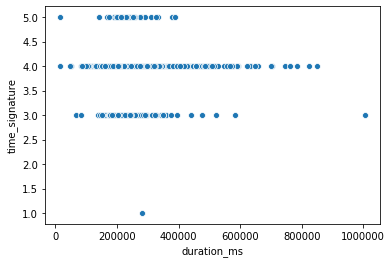

In [20]:
sns.scatterplot(x='duration_ms',y='time_signature',data=data)

* We can say that the 'time_signature', 'duration_ms' are not correlated

In [21]:
data['song_title'].nunique()

1956

In [22]:
data['artist'].nunique()

1343

### Transforming the Skewed disdribution to normal Distribution

#### Using Log Transformation

#### For "acousticness"

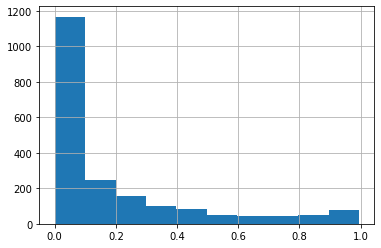

In [23]:
# 'acousticness','duration_ms', 'instrumentalness','liveness' and 'speechiness' are skewed 

data['acousticness'].hist()

In [25]:
# applying log transformation for 'acousticness'
log_data = pd.DataFrame()
log_data['log_acousticness'] = np.log(data['acousticness'])
log_data['log_acousticness']

0      -4.585368
1      -1.614450
2      -3.369699
3      -0.504181
4      -1.714798
          ...   
2012   -6.849486
2013   -2.433833
2014   -4.759488
2015   -6.413059
2016   -5.874571
Name: log_acousticness, Length: 2017, dtype: float64

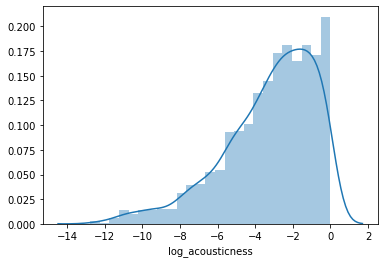

In [26]:
sns.distplot(log_data['log_acousticness'])

#### For "duration_ms"

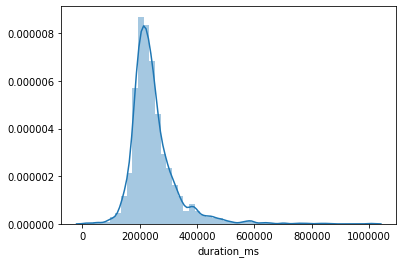

In [27]:
sns.distplot(data['duration_ms'])

In [28]:
# applying log transformation for 'duration_ms'
log_data['log_duration_ms'] = np.log(data['duration_ms'])
log_data['log_duration_ms']

0       12.228812
1       12.697511
2       12.131925
3       12.203133
4       12.881293
          ...    
2012    12.522357
2013    12.112761
2014    12.241440
2015    12.131349
2016    12.228421
Name: log_duration_ms, Length: 2017, dtype: float64

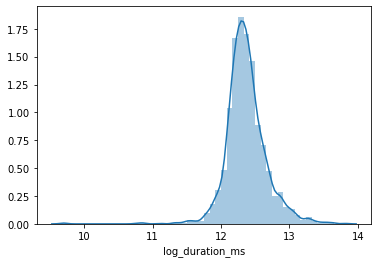

In [29]:

sns.distplot(log_data['log_duration_ms'])

#### For "instrumentalness"

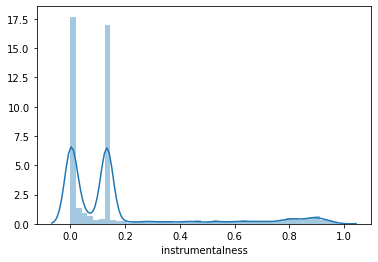

In [30]:
sns.distplot(data['instrumentalness'])

In [31]:
# applying log transformation for 'instrumentalness'
log_data['log_instrumentalness'] = np.log(data['instrumentalness'])
log_data['log_instrumentalness']

0       -3.821269
1       -5.097829
2       -8.360189
3       -0.673345
4       -0.669431
          ...    
2012    -5.918214
2013    -6.394932
2014    -5.523964
2015    -0.390084
2016   -10.159671
Name: log_instrumentalness, Length: 2017, dtype: float64

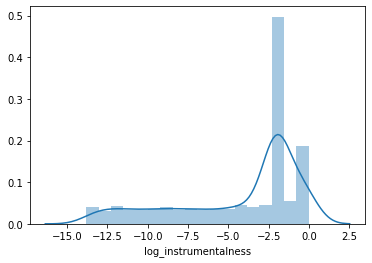

In [32]:
sns.distplot(log_data['log_instrumentalness'])

### For "liveness"

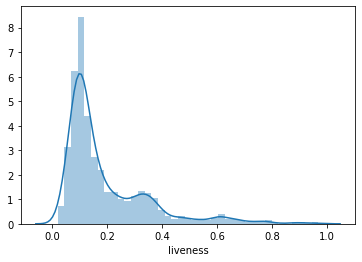

In [33]:
sns.distplot(data['liveness'])

In [34]:
# applying log transformation for 'liveness'
log_data['log_liveness'] = np.log(data['liveness'])
log_data['log_liveness']

0      -1.801810
1      -1.987774
2      -1.838851
3      -2.383795
4      -0.823256
          ...   
2012   -2.047943
2013   -2.941244
2014   -1.541779
2015   -2.393604
2016   -1.523260
Name: log_liveness, Length: 2017, dtype: float64

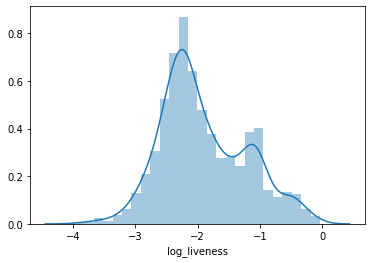

In [35]:
sns.distplot(log_data['log_liveness'])

### For "speechiness"

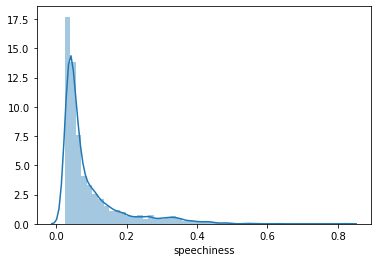

In [36]:
sns.distplot(data['speechiness'])

In [37]:
# applying log transformation for 'speechiness'
log_data['log_speechiness'] = np.log(data['speechiness'])
log_data['log_speechiness']

0      -0.841647
1      -2.533257
2      -1.241329
3      -3.645820
4      -2.667868
          ...   
2012   -1.099613
2013   -2.032558
2014   -2.234926
2015   -2.017406
2016   -1.958995
Name: log_speechiness, Length: 2017, dtype: float64

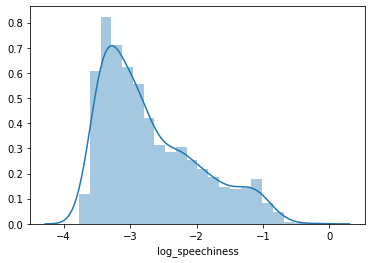

In [38]:
sns.distplot(log_data['log_speechiness'])

In [39]:
log_data

,log_acousticness,log_duration_ms,log_instrumentalness,log_liveness,log_speechiness
0,-4.585368,12.228812,-3.821269,-1.801810,-0.841647
1,-1.614450,12.697511,-5.097829,-1.987774,-2.533257
2,-3.369699,12.131925,-8.360189,-1.838851,-1.241329
3,-0.504181,12.203133,-0.673345,-2.383795,-3.645820
4,-1.714798,12.881293,-0.669431,-0.823256,-2.667868
...,...,...,...,...,...
2012,-6.849486,12.522357,-5.918214,-2.047943,-1.099613
2013,-2.433833,12.112761,-6.394932,-2.941244,-2.032558
2014,-4.759488,12.241440,-5.523964,-1.541779,-2.234926
2015,-6.413059,12.131349,-0.390084,-2.393604,-2.017406


In [41]:
pd.concat([data,log_data],axis=1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,time_signature,valence,target,song_title,artist,log_acousticness,log_duration_ms,log_instrumentalness,log_liveness,log_speechiness
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,4.0,0.286,1,Mask Off,Future,-4.585368,12.228812,-3.821269,-1.801810,-0.841647
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,4.0,0.588,1,Redbone,Childish Gambino,-1.614450,12.697511,-5.097829,-1.987774,-2.533257
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,4.0,0.173,1,Xanny Family,Future,-3.369699,12.131925,-8.360189,-1.838851,-1.241329
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,4.0,0.230,1,Master Of None,Beach House,-0.504181,12.203133,-0.673345,-2.383795,-3.645820
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,4.0,0.904,1,Parallel Lines,Junior Boys,-1.714798,12.881293,-0.669431,-0.823256,-2.667868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,...,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,-6.849486,12.522357,-5.918214,-2.047943,-1.099613
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,...,4.0,0.867,0,Candy,Dillon Francis,-2.433833,12.112761,-6.394932,-2.941244,-2.032558
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,...,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,-4.759488,12.241440,-5.523964,-1.541779,-2.234926
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,...,4.0,0.623,0,First Contact,Twin Moons,-6.413059,12.131349,-0.390084,-2.393604,-2.017406


In [43]:
data.drop(['acousticness','duration_ms', 'instrumentalness','liveness','speechiness'],axis=1,inplace=True)

### Encoding the 'song_title' and 'artist' columns

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ['song_title','artist']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head(n=5)

,danceability,energy,key,loudness,mode,tempo,time_signature,valence,target,song_title,artist
0,0.833,0.434,2,-8.795,1,150.062,4.0,0.286,1,1043,449
1,0.743,0.359,1,-10.401,1,160.083,4.0,0.588,1,1334,222
2,0.838,0.412,2,-7.148,1,75.044,4.0,0.173,1,1906,449
3,0.494,0.338,5,-15.236,1,86.468,4.0,0.230,1,1044,95
4,0.678,0.561,5,-11.648,0,174.004,4.0,0.904,1,1243,628


In [69]:
x = data.drop('target',axis=1)
y = data['target']

### Spliting the data 

In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=30)

### Scaling the data

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### Training Decision tree model 

In [88]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(criterion='gini', splitter = 'random', max_depth=150)

In [89]:
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=150, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [90]:
decision_predict = decision_model.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score
decision_acc = accuracy_score(y_test, decision_predict)

print ("Model accuracy:"+str(accuracy_score(y_test, decision_predict)*100))
print("Train Set Accuracy:"+str(accuracy_score(y_train,decision_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,decision_model.predict(x_test))*100))

Model accuracy:64.85148514851485
Train Set Accuracy:99.87600743955363
Test Set Accuracy:64.85148514851485


In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,decision_predict)

array([[138,  74],
       [ 68, 124]], dtype=int64)

In [99]:
decision_predict = decision_model.predict(x_test).ravel()
decision_predict

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, decision_predict)

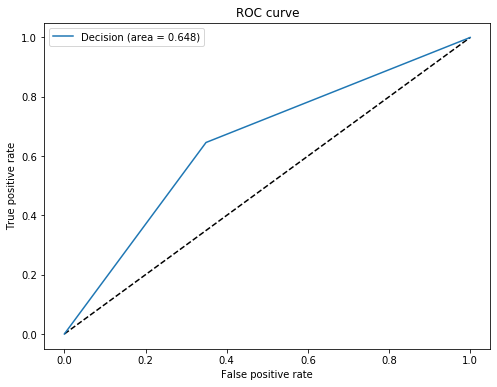

In [110]:
from sklearn.metrics import auc
auc = auc(fpr_keras, tpr_keras)


plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
